# Predicting whether & how a Red Devil will play in the next match 

### importing packages

In [10]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

### importing dataset

In [3]:
data = pd.read_csv('Dataset_ManUtd_Player_Performance_2019-20.csv')

In [4]:
data.fillna(0,inplace=True)
data.head()

,Last Name,First Name,Age,Appearances this EPL Season,Appearances in last 5 matches,Goals Scored this EPL Season,Goals Assisted this EPL Season,Own Goals this EPL Season,Goals Scored in last 5 matches,Goals Assited in last 5 matches,...,Yellow Cards in last 5 matches,Red Cards in last 5 matches,Penalty Goals this EPL Season,Penalty Goals in last 5 matches,Minutes Per Goal this EPL Season,Total Minutes Played this EPL Season,Total minutes in last 5 matches,Injury Status this EPL Season,Form this EPL Season,Form in last 5 matches
0,Rashford,Marcus,22,12,5.0,6.0,3.0,0.0,5.0,0.0,...,1.0,0.0,2.0,0.0,173.0,1040.0,417.0,0.00,6.2,0.0
1,Wan Bissaka,Aaron,21,10,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,891.0,441.0,0.00,1.8,0.0
2,McTominay,Scott,22,12,5.0,3.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,356.0,1067.0,111.0,0.75,4.2,0.0
3,Pogba,Paul,26,5,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,450.0,0.0,1.00,0.0,0.0
4,Martial,Anthony,23,7,5.0,3.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,177.0,531.0,369.0,0.00,4.8,0.0


In [5]:
data.describe()

,Age,Appearances this EPL Season,Appearances in last 5 matches,Goals Scored this EPL Season,Goals Assisted this EPL Season,Own Goals this EPL Season,Goals Scored in last 5 matches,Goals Assited in last 5 matches,Own Goals in last 5 matches,Goals Conceded this EPL Season,...,Yellow Cards in last 5 matches,Red Cards in last 5 matches,Penalty Goals this EPL Season,Penalty Goals in last 5 matches,Minutes Per Goal this EPL Season,Total Minutes Played this EPL Season,Total minutes in last 5 matches,Injury Status this EPL Season,Form this EPL Season,Form in last 5 matches
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.000000,28.0,28.000000,...,28.000000,28.0,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,24.500000,5.821429,2.214286,0.642857,0.464286,0.0,0.392857,0.250000,0.0,0.428571,...,0.285714,0.0,0.071429,0.0,65.392857,420.750000,160.178571,0.223214,1.232143,0.0
std,4.434712,4.538343,2.233701,1.445665,0.922241,0.0,1.065947,0.700529,0.0,2.267787,...,0.712697,0.0,0.377964,0.0,173.317593,417.258568,173.838378,0.380906,1.791968,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,21.750000,1.750000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,20.250000,0.000000,0.000000,0.000000,0.0
50%,24.500000,5.000000,1.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,258.500000,100.500000,0.000000,0.000000,0.0
75%,27.000000,10.250000,5.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,820.500000,295.000000,0.500000,1.850000,0.0
max,34.000000,12.000000,5.000000,6.000000,3.000000,0.0,5.000000,3.000000,0.0,12.000000,...,3.000000,0.0,2.000000,0.0,797.000000,1080.000000,450.000000,1.000000,6.200000,0.0


In [17]:
def scatter_plot(xlabel, ylabel):
    plt.scatter(data[xlabel], data[ylabel])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

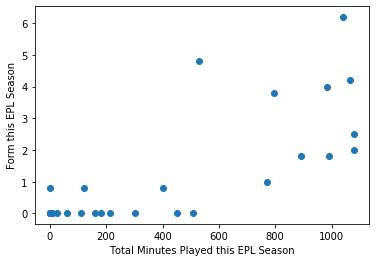

In [26]:
scatter_plot('Total Minutes Played this EPL Season', 'Form this EPL Season')

In [28]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Total Minutes Played this EPL Season','Form this EPL Season']])
y_predicted

array([3, 1, 3, 0, 0, 3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [30]:
data['cluster']=y_predicted
data.head()

,Last Name,First Name,Age,Appearances this EPL Season,Appearances in last 5 matches,Goals Scored this EPL Season,Goals Assisted this EPL Season,Own Goals this EPL Season,Goals Scored in last 5 matches,Goals Assited in last 5 matches,...,Red Cards in last 5 matches,Penalty Goals this EPL Season,Penalty Goals in last 5 matches,Minutes Per Goal this EPL Season,Total Minutes Played this EPL Season,Total minutes in last 5 matches,Injury Status this EPL Season,Form this EPL Season,Form in last 5 matches,cluster
0,Rashford,Marcus,22,12,5.0,6.0,3.0,0.0,5.0,0.0,...,0.0,2.0,0.0,173.0,1040.0,417.0,0.00,6.2,0.0,3
1,Wan Bissaka,Aaron,21,10,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,891.0,441.0,0.00,1.8,0.0,1
2,McTominay,Scott,22,12,5.0,3.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,356.0,1067.0,111.0,0.75,4.2,0.0,3
3,Pogba,Paul,26,5,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,450.0,0.0,1.00,0.0,0.0,0
4,Martial,Anthony,23,7,5.0,3.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,177.0,531.0,369.0,0.00,4.8,0.0,0


In [31]:
km.cluster_centers_

array([[4.38400000e+02, 1.12000000e+00],
       [8.20000000e+02, 2.20000000e+00],
       [6.33571429e+01, 1.14285714e-01],
       [1.04033333e+03, 3.45000000e+00]])

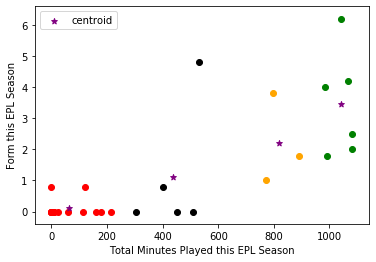

In [47]:
xlabel = 'Total Minutes Played this EPL Season'
ylabel = 'Form this EPL Season'

df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]
plt.scatter(df1[xlabel],df1[ylabel],color='black')
plt.scatter(df2[xlabel],df2[ylabel],color='orange')
plt.scatter(df3[xlabel],df3[ylabel],color='red')
plt.scatter(df4[xlabel],df4[ylabel],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()